# Exploración dataset imdb

Notebook inicial para explorar los dataset de películas de imdb. Han sido descargados de [Kaggle](https://www.kaggle.com/stefanoleone992/imdb-extensive-dataset)

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings


warnings.filterwarnings('ignore')

%matplotlib inline

In [71]:
!ls ./data

IMDb movies.csv        movies_clean.csv       movies_with_labels.csv


In [72]:
df = pd.read_csv('./data/IMDb movies.csv')
len(df.columns), len(df)

(22, 85855)

In [73]:
df.columns

Index(['imdb_title_id', 'title', 'original_title', 'year', 'date_published',
       'genre', 'duration', 'country', 'language', 'director', 'writer',
       'production_company', 'actors', 'description', 'avg_vote', 'votes',
       'budget', 'usa_gross_income', 'worlwide_gross_income', 'metascore',
       'reviews_from_users', 'reviews_from_critics'],
      dtype='object')

Eliminamos las columnas que no nos harán falta para nuestro modelo de machine learning

In [74]:
df = df[['imdb_title_id', 'original_title', 'year', 'genre', 'duration', 'country', 'votes', 'description']]

In [75]:
df.head()

,imdb_title_id,original_title,year,genre,duration,country,votes,description
0,tt0000009,Miss Jerry,1894,Romance,45,USA,154,The adventures of a female reporter in the 1890s.
1,tt0000574,The Story of the Kelly Gang,1906,"Biography, Crime, Drama",70,Australia,589,True story of notorious Australian outlaw Ned ...
2,tt0001892,Den sorte drøm,1911,Drama,53,"Germany, Denmark",188,Two men of high rank are both wooing the beaut...
3,tt0002101,Cleopatra,1912,"Drama, History",100,USA,446,The fabled queen of Egypt's affair with Roman ...
4,tt0002130,L'Inferno,1911,"Adventure, Drama, Fantasy",68,Italy,2237,Loosely adapted from Dante's Divine Comedy and...


### Limpieza de los datos.

In [76]:
df.shape

(85855, 8)

In [77]:
df.isnull().sum()

imdb_title_id        0
original_title       0
year                 0
genre                0
duration             0
country             64
votes                0
description       2115
dtype: int64

In [78]:
# Eliminamos las filas con datos nulos
df = df.dropna()

In [79]:
df.isnull().sum()

imdb_title_id     0
original_title    0
year              0
genre             0
duration          0
country           0
votes             0
description       0
dtype: int64

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83676 entries, 0 to 85854
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   imdb_title_id   83676 non-null  object
 1   original_title  83676 non-null  object
 2   year            83676 non-null  object
 3   genre           83676 non-null  object
 4   duration        83676 non-null  int64 
 5   country         83676 non-null  object
 6   votes           83676 non-null  int64 
 7   description     83676 non-null  object
dtypes: int64(2), object(6)
memory usage: 5.7+ MB


In [81]:
# La columna year tiene un valor 'TV Movie 2019'. Eliminamos esa fila
df = df[df.year != 'TV Movie 2019']

In [82]:
# Ya podemos transformar la columna year a entero
df.year = df.year.astype(int)

In [83]:
df.head()

,imdb_title_id,original_title,year,genre,duration,country,votes,description
0,tt0000009,Miss Jerry,1894,Romance,45,USA,154,The adventures of a female reporter in the 1890s.
1,tt0000574,The Story of the Kelly Gang,1906,"Biography, Crime, Drama",70,Australia,589,True story of notorious Australian outlaw Ned ...
2,tt0001892,Den sorte drøm,1911,Drama,53,"Germany, Denmark",188,Two men of high rank are both wooing the beaut...
3,tt0002101,Cleopatra,1912,"Drama, History",100,USA,446,The fabled queen of Egypt's affair with Roman ...
4,tt0002130,L'Inferno,1911,"Adventure, Drama, Fantasy",68,Italy,2237,Loosely adapted from Dante's Divine Comedy and...


In [84]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df.describe()

,year,duration,votes
count,83675.00000,83675.00000,83675.00000
mean,1993.40295,100.43278,9715.78609
std,24.33824,22.64358,54222.43011
min,1894.00000,41.00000,99.00000
25%,1979.00000,88.00000,211.00000
50%,2002.00000,96.00000,505.00000
75%,2013.00000,108.00000,1843.50000
max,2020.00000,808.00000,2278845.00000


Nos quedamos con las películas que tienen más de 2000 votos, ya que es bastante difícil hoy en día poder acceder a ver películas que no se encuentran en ninguna plataforma.

In [85]:
df = df[df.votes >= 2000]

In [86]:
df.shape

(19986, 8)

Creamos una nueva columna que tendrá los valores Classic en el caso de que la película sea anterior a 1990 y current para posterior a 1990.

In [87]:
df['epoch'] = df.year.apply(lambda x: 'classic' if x < 1990 else 'current')

In [88]:
df.head()

,imdb_title_id,original_title,year,genre,duration,country,votes,description,epoch
4,tt0002130,L'Inferno,1911,"Adventure, Drama, Fantasy",68,Italy,2237,Loosely adapted from Dante's Divine Comedy and...,classic
24,tt0003740,Cabiria,1914,"Adventure, Drama, History",148,Italy,3073,Cabiria is a Roman child when her home is dest...,classic
39,tt0004707,Tillie's Punctured Romance,1914,Comedy,82,USA,3250,A con man from the city dupes a wealthy countr...,classic
47,tt0004972,The Birth of a Nation,1915,"Drama, History, War",195,USA,22213,The Stoneman family finds its friendship with ...,classic
49,tt0005078,The Cheat,1915,"Drama, Romance",59,USA,2305,"A venal, spoiled stockbroker's wife impulsivel...",classic


In [89]:
df.tail()

,imdb_title_id,original_title,year,genre,duration,country,votes,description,epoch
85791,tt9831136,The Banana Splits Movie,2019,"Comedy, Horror, Sci-Fi",89,"USA, South Africa, Canada",2373,A family attends a live taping of The Banana S...,current
85811,tt9860728,Falling Inn Love,2019,"Comedy, Romance",98,USA,14108,When city girl Gabriela spontaneously enters a...,current
85837,tt9894470,VFW,2019,"Action, Crime, Horror",92,USA,4178,A group of old war veterans put their lives on...,current
85839,tt9898858,Coffee & Kareem,2020,"Action, Comedy",88,USA,10627,Twelve-year-old Kareem Manning hires a crimina...,current
85843,tt9900782,Kaithi,2019,"Action, Thriller",145,India,8400,A recently released prisoner becomes involved ...,current


Renombramos las columnas del dataset. La primera tendrá el nombre id y la columna duration tendrá el nombre duration_time

In [90]:
df.columns = ['id', 'title', 'year', 'genre', 'duration_time', 'country', 'votes', 'description', 'epoch']

In [91]:
df.head()

,id,title,year,genre,duration_time,country,votes,description,epoch
4,tt0002130,L'Inferno,1911,"Adventure, Drama, Fantasy",68,Italy,2237,Loosely adapted from Dante's Divine Comedy and...,classic
24,tt0003740,Cabiria,1914,"Adventure, Drama, History",148,Italy,3073,Cabiria is a Roman child when her home is dest...,classic
39,tt0004707,Tillie's Punctured Romance,1914,Comedy,82,USA,3250,A con man from the city dupes a wealthy countr...,classic
47,tt0004972,The Birth of a Nation,1915,"Drama, History, War",195,USA,22213,The Stoneman family finds its friendship with ...,classic
49,tt0005078,The Cheat,1915,"Drama, Romance",59,USA,2305,"A venal, spoiled stockbroker's wife impulsivel...",classic


Creamos una nueva columna llamada duration, que contendra los valores short en el caso de que la película dure menos de 90 minutos, normal en el caso de que la película dure menos de 125 minutos y long en el caso de que la película dure más de 125 minutos

In [92]:
def set_duration(minutes):
    
    if minutes <= 90:
        return 'short'
    elif minutes <= 125:
        return 'normal'
    else:
        return 'long'

df['duration'] = df.duration_time.apply(set_duration)

In [93]:
df.head()

,id,title,year,genre,duration_time,country,votes,description,epoch,duration
4,tt0002130,L'Inferno,1911,"Adventure, Drama, Fantasy",68,Italy,2237,Loosely adapted from Dante's Divine Comedy and...,classic,short
24,tt0003740,Cabiria,1914,"Adventure, Drama, History",148,Italy,3073,Cabiria is a Roman child when her home is dest...,classic,long
39,tt0004707,Tillie's Punctured Romance,1914,Comedy,82,USA,3250,A con man from the city dupes a wealthy countr...,classic,short
47,tt0004972,The Birth of a Nation,1915,"Drama, History, War",195,USA,22213,The Stoneman family finds its friendship with ...,classic,long
49,tt0005078,The Cheat,1915,"Drama, Romance",59,USA,2305,"A venal, spoiled stockbroker's wife impulsivel...",classic,short


Por último, creamos una nueva columna llamada known en la cual tendrá los valores known en el caso de que la película tenga más de 20000 votos y unknown si la película tiene menos de 20000 votos

In [94]:
df['known'] = df.votes.apply(lambda x: 'known' if x >= 20000 else 'unknown')

In [95]:
df.head()

,id,title,year,genre,duration_time,country,votes,description,epoch,duration,known
4,tt0002130,L'Inferno,1911,"Adventure, Drama, Fantasy",68,Italy,2237,Loosely adapted from Dante's Divine Comedy and...,classic,short,unknown
24,tt0003740,Cabiria,1914,"Adventure, Drama, History",148,Italy,3073,Cabiria is a Roman child when her home is dest...,classic,long,unknown
39,tt0004707,Tillie's Punctured Romance,1914,Comedy,82,USA,3250,A con man from the city dupes a wealthy countr...,classic,short,unknown
47,tt0004972,The Birth of a Nation,1915,"Drama, History, War",195,USA,22213,The Stoneman family finds its friendship with ...,classic,long,known
49,tt0005078,The Cheat,1915,"Drama, Romance",59,USA,2305,"A venal, spoiled stockbroker's wife impulsivel...",classic,short,unknown


In [96]:
df.tail()

,id,title,year,genre,duration_time,country,votes,description,epoch,duration,known
85791,tt9831136,The Banana Splits Movie,2019,"Comedy, Horror, Sci-Fi",89,"USA, South Africa, Canada",2373,A family attends a live taping of The Banana S...,current,short,unknown
85811,tt9860728,Falling Inn Love,2019,"Comedy, Romance",98,USA,14108,When city girl Gabriela spontaneously enters a...,current,normal,unknown
85837,tt9894470,VFW,2019,"Action, Crime, Horror",92,USA,4178,A group of old war veterans put their lives on...,current,normal,unknown
85839,tt9898858,Coffee & Kareem,2020,"Action, Comedy",88,USA,10627,Twelve-year-old Kareem Manning hires a crimina...,current,short,unknown
85843,tt9900782,Kaithi,2019,"Action, Thriller",145,India,8400,A recently released prisoner becomes involved ...,current,long,unknown


Por último, borramos los atributos year, duration_time y votes ya que no los vamos a usar más

In [97]:
df = df[['id', 'title', 'genre', 'country', 'epoch', 'duration', 'known', 'description']]

In [98]:
df.shape

(19986, 8)

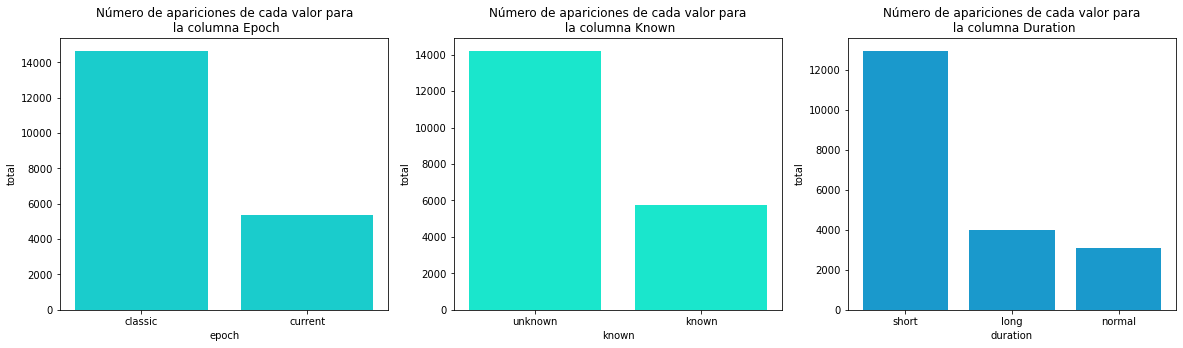

In [99]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))

ax1.bar(df.epoch.unique(), df.epoch.value_counts(), color=[(0.1), (0.8), (0.8)])
ax1.set(title='Número de apariciones de cada valor para\n la columna Epoch',
       xlabel='epoch',
       ylabel='total')

ax2.bar(df.known.unique(), df.known.value_counts(), color=[(0.1), (0.9), (0.8)])
ax2.set(title='Número de apariciones de cada valor para\n la columna Known',
       xlabel='known',
       ylabel='total')

ax3.bar(df.duration.unique(), df.duration.value_counts(), color=[(0.1), (0.6), (0.8)])
ax3.set(title='Número de apariciones de cada valor para\n la columna Duration',
       xlabel='duration',
       ylabel='total')

plt.show()

In [100]:
genres = {}
for index, row in df.iterrows():
    tmp = row.genre.split(', ')
    for i in tmp:
        if i in genres:
            genres[i] += 1
        else:
            genres[i] = 1

In [101]:
df2 = pd.DataFrame.from_dict(genres, orient='index')
df2.columns = ['count']
df2['genre'] = df2.index
df2.index = np.arange(0, len(df2), 1)
df2.count = df2['count'].astype('int')
df2.head(50)

,count,genre
0,2566,Adventure
1,11551,Drama
2,1304,Fantasy
3,707,History
4,7325,Comedy
5,539,War
6,3721,Romance
7,4156,Action
8,3570,Crime
9,2616,Horror


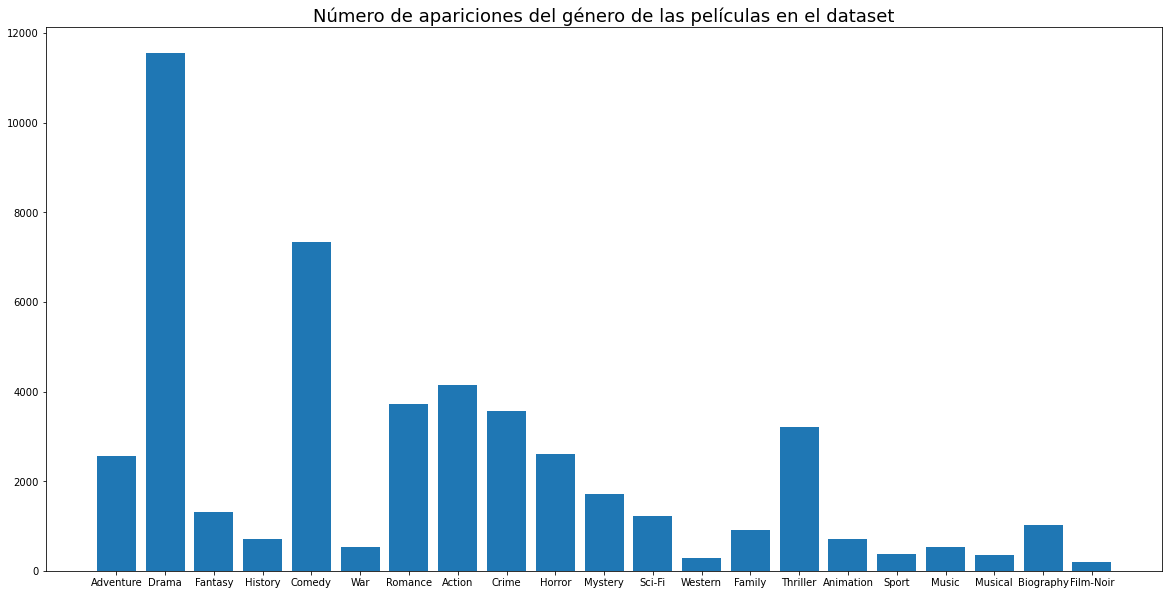

In [102]:
plt.figure(figsize=(20,10))
plt.bar(df2.genre, df2['count'])
plt.title('Número de apariciones del género de las películas en el dataset', fontsize=18)
plt.show()

In [103]:
# Ya tenemos el dataset limpio, por lo que lo guardamos
df.to_csv('./data/movies_clean.csv', index=False, header=True)

In [127]:
df[df.title == 'Toy Story']

,id,title,genre,country,epoch,duration,known,description
29371,tt0114709,Toy Story,"Animation, Adventure, Comedy",USA,current,short,known,A cowboy doll is profoundly threatened and jea...
